# Project: Wrangle and Analyze Data

In [583]:
import json
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import requests
from scipy import stats
import tweepy


## Gather Data

### Twitter Archive (Local File)

In [85]:
# Contains tweets with extra info already parsed from text
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### Image Predictions (URL)

In [11]:
# Predictions of dog breeds
url_image_predictions = ('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/'
                         '599fd2ad_image-predictions/image-predictions.tsv')

# Create dataframe from TSV
df_image_predictions = pd.read_csv(url_image_predictions, delimiter='\t')

### Tweets (Twitter API)

In [ ]:
# Twitter API for more data (save to local file)
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [9]:
# Store data on tweet_json.txt
with open('tweet_json.txt', 'w') as outfile: 
    for tweet_id in df_twitter_archive['twitter_ids']:
        try:
            tweet = api.get_status(tweet_id)
            # Convert to JSON and write
            json.dump(tweet._json, outfile)
            outfile.write("\n")
            
        except:  # could be the case the tweet was deleted
            print('ERROR: Error on tweet id {}'.format(tweet_id))
            e = os.sys.exc_info()[0]

ERROR: Error on tweet id 888202515573088257
ERROR: Error on tweet id 873697596434513921
ERROR: Error on tweet id 869988702071779329
ERROR: Error on tweet id 866816280283807744
ERROR: Error on tweet id 861769973181624320
ERROR: Error on tweet id 842892208864923648
ERROR: Error on tweet id 827228250799742977
ERROR: Error on tweet id 802247111496568832
ERROR: Error on tweet id 775096608509886464
Rate limit reached. Sleeping for: 715
Rate limit reached. Sleeping for: 754


In [12]:
# Save only certain tweet elements in dataframe
elements_to_save = ['id', 'favorite_count', 'retweet_count']
# Later convert list to dataframe
data = []

with open('tweet_json.txt', 'r') as readfile: 
    # Read in JSON line and convert to dict
    tweet_json = readfile.readline()
    
    # Read line by line into DataFrame
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        # Create a smaller dict
        data_row = dict((k, tweet_dict[k]) for k in elements_to_save)
        data.append(data_row)
        
        # Read in JSON line and convert to dict
        tweet_json = readfile.readline()
        
            
    
df_tweet_info = pd.DataFrame.from_dict(data)

## Assess Data

In [86]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [83]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [84]:
df_tweet_info

,favorite_count,id,retweet_count
0,39135,892420643555336193,8703
1,33512,892177421306343426,6387
2,25260,891815181378084864,4243
3,42484,891689557279858688,8799
4,40653,891327558926688256,9577
5,20395,891087950875897856,3178
6,11951,890971913173991426,2117
7,66123,890729181411237888,19278
8,27995,890609185150312448,4339
9,32215,890240255349198849,7568


In [88]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [23]:
df_twitter_archive[df_twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [181]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [25]:
df_twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Buddy          7
Toby           7
Bailey         7
Daisy          7
an             7
Milo           6
Dave           6
Bella          6
Oscar          6
Stanley        6
Scout          6
Jax            6
Leo            6
Jack           6
Rusty          6
Koda           6
Alfie          5
            ... 
Charleson      1
Ozzie          1
Kramer         1
Ralphé         1
my             1
Peanut         1
Dewey          1
Shadoe         1
Link           1
his            1
Dunkin         1
Hubertson      1
Rumpole        1
Wesley         1
Horace         1
Sparky         1
Jockson        1
Richie         1
Dot            1
Chadrick       1
Pavlov         1
Tom            1
Holly          1
Banditt        1
Adele          1
Tayzie         1
Eevee          1
Staniel       

In [107]:
df_image_predictions.info()
df_image_predictions.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [114]:
df_image_predictions.p1.value_counts()
df_image_predictions.p2.value_counts()
df_image_predictions.p3.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Pembroke                           27
collie                             27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
chow                               20
miniature_pinscher                 20
toy_terrier                        20
malinois                           20
Samoyed                            20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [97]:
df_tweet_info.info()
df_tweet_info.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 3 columns):
favorite_count    2347 non-null int64
id                2347 non-null int64
retweet_count     2347 non-null int64
dtypes: int64(3)
memory usage: 55.1 KB


,favorite_count,id,retweet_count
count,2347.000000,2.347000e+03,2347.000000
mean,8116.636131,7.423783e+17,3064.982957
std,12203.641579,6.836841e+16,5089.943627
min,0.000000,6.660209e+17,0.000000
25%,1408.500000,6.783846e+17,611.500000
50%,3566.000000,7.189719e+17,1434.000000
75%,10049.500000,7.987038e+17,3575.500000
max,144158.000000,8.924206e+17,78214.000000


#### Quality

##### `df_twitter_archive` table
- `name` is sometimes not an actual name
- wrong data types (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `timestamp` and `retweeted_status_timestamp`)
- missing some `expanded_urls`
- incorrect `rating_numerator` and `rating_denominator` for 1069th, 1166th, 2336th entries 
- 343rd entry is not a dog rating
- some entries should be classified as puppers (missing data)
- some entries are retweets

##### `df_image_predictions` table
- `p1`, `p2`, `p3` inconsistent capitalization (sometimes first letter is capital)
- missing data (only has 2075 entries instead of 2356)

##### `df_tweet_info` table
- missing data (only has 2347 entries instead of 2356)

#### Tidiness

- Three data frames `df_twitter_archive`, `df_image_predictions`, and `df_tweet_info` should be one (combined table) since all tables' entries are each describing one tweet

##### `df_twitter_archive` table
- one variable in four columns (`doggo`, `floofer`, `pupper`, and `puppo`)
- retweet columns not needed (not investigating retweets)

## Clean Data

In [438]:
# Make copies of dataframes to clean 
df_clean_twitter_archive = df_twitter_archive.copy()
df_clean_image_predictions = df_image_predictions.copy()
df_clean_tweet_info = df_tweet_info.copy()

### `df_twitter_archive`

#### **name is sometimes not an actual name**

#### Define

*(NOTE: There are many non-names in the dataset, so only names that have "a" will be fixed for this data set)*

Set "a" to "None" if no name given otherwise fix name 

#### Code

In [439]:

def replace_names(row):
    # Only try to replace name if it is 'a'
    if row['name'] == 'a':    
        #get text from row
        text = row['text']
        
        # get list of words from the text
        word_list = text.split()

        # defaults to no name
        name = 'None'

        # get name from 'named {}'
        if 'named' in word_list:
            # Get the next word after 'named'
            name_pos = word_list.index('named') + 1
            name = word_list[name_pos]

        # get name from 'name is {}'
        elif 'name is' in text:
            # Get the next word after 'name is' (skip 'is')
            name_pos = word_list.index('name') + 2
            name = word_list[name_pos]

        #only replace the 'name' column (with no period)
        row['name'] = name.replace('.','')
    
    # Return row whether updated or name
    return row
    

df_clean_twitter_archive = df_clean_twitter_archive.apply(replace_names, axis=1)

#### Test

In [440]:
# Check if there is no 'a' names
'a' in df_clean_twitter_archive['name']

False

### `df_twitter_archive`
#### **wrong data types (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, timestamp and retweeted_status_timestamp)**

#### Define

Change in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id to int64

Change timestamp and retweeted_status_timestamp to datetimes

#### Code

In [441]:
# To integer
# TODO: Convert data types to integer but ignore null values (?)


# To datetime
df_clean_twitter_archive.timestamp = pd.to_datetime(df_clean_twitter_archive.timestamp)
df_clean_twitter_archive.retweeted_status_timestamp = pd.to_datetime(df_clean_twitter_archive.retweeted_status_timestamp)

#### Test

In [442]:
# Check data types are now correct
df_clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

### `df_twitter_archive`
#### **missing some expanded_urls**

#### Define

Use tweet_id to get expanded_urls

#### Code

In [443]:
# If expanded_urls is null, add by using tweet id
def add_urls(row):
    # Don't do anything if expanded_urls is not null
    if pd.notnull(row['expanded_urls']):
        return row
    else:
        # Get tweet_id
        tweet_id = row['tweet_id']
        # Make new URL and save into expanded_urls
        row['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(tweet_id)
        # return updated row
        return row


# Save dataframe with missing urls
df_clean_twitter_archive = df_clean_twitter_archive.apply(add_urls, axis=1)

#### Test

In [444]:
# Check that there are no empty expanded_urls
df_clean_twitter_archive[df_clean_twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### `df_twitter_archive`
#### **incorrect rating_numerator and rating_denominator for 1069th, 1166th, and 2336th entries**

#### Define

Replace ratings manually by looking at text from tweet

#### Code

In [445]:
# List of problem entries (entries starts at 0)
problem_entries_indexes = [x-1 for x in [1069, 1166, 2336]]
problem_entries = df_clean_twitter_archive.iloc[problem_entries_indexes]

for txt in problem_entries.text:#rating_numerator:
        print(txt)

df_clean_twitter_archive.at[problem_entries_indexes[0], 'rating_numerator'] = 14
df_clean_twitter_archive.at[problem_entries_indexes[0], 'rating_denominator'] = 10

df_clean_twitter_archive.at[problem_entries_indexes[1], 'rating_numerator'] = 13
df_clean_twitter_archive.at[problem_entries_indexes[1], 'rating_denominator'] = 10

df_clean_twitter_archive.at[problem_entries_indexes[2], 'rating_numerator'] = 9
df_clean_twitter_archive.at[problem_entries_indexes[2], 'rating_denominator'] = 10


After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


#### Test

In [446]:
# Get only the entries we were changing from updated dataframe
problem_entries = df_clean_twitter_archive.iloc[problem_entries_indexes]

#
values = zip(problem_entries.text, problem_entries.rating_numerator, problem_entries.rating_denominator)
for (txt, n, d) in values:
        print('{}/{} from: \n\t"{}"'.format(n,d,txt))

14/10 from: 
	"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
13/10 from: 
	"Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a"
9/10 from: 
	"This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv"


### `df_twitter_archive`
#### **343rd entry  is not a dog rating**

#### Define

Remove 343th entry from dataframe

#### Code

In [447]:
# Drop 343rd entry (index=342 since starts at zero)
df_clean_twitter_archive = df_clean_twitter_archive.drop(df_clean_twitter_archive.index[342])

#### Test

In [448]:
# Check entries about point 
df_clean_twitter_archive.iloc[340:343]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
341,832215726631055365,NaN,NaN,2017-02-16 13:11:05,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Moreton. He's the Good ...,7.932865e+17,4.196984e+09,2016-11-01 03:00:09,https://twitter.com/dog_rates/status/793286476...,13,10,Moreton,None,None,None,None
343,832040443403784192,NaN,NaN,2017-02-16 01:34:34,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Klein. These pics were ...,7.699404e+17,4.196984e+09,2016-08-28 16:51:16,https://twitter.com/dog_rates/status/769940425...,12,10,Klein,None,None,None,None


### `df_twitter_archive`
#### **some entries should be classified as puppers (missing data)**

#### Define

Find when text has "puppers" in it and add "pupper" to `pupper` column

#### Code

In [449]:
# Find when 'puppers' is used in text column
def add_puppers(row):
    # Only do something if 'puppers' is in text
    if 'puppers' in row['text']:
        # Update row to reflect we have a pupper
        row['pupper'] = 'pupper'
        
    # return row whether or not it was updated    
    return row


# Save dataframe with missing urls
df_clean_twitter_archive = df_clean_twitter_archive.apply(add_puppers, axis=1)

#### Test

### `df_twitter_archive`
#### **some entries are retweets**

#### Define

Find entries that are retweets by matching text pattern 'RT @...' and drop entries from the table

#### Code

In [450]:
# Find all the retweets 
retweets = df_clean_twitter_archive.text.str.match('^RT @')

# Only keep the tweets that aren't retweets
df_clean_twitter_archive = df_clean_twitter_archive[~retweets]

#### Test

In [451]:
# Test that we have no retweets
retweets = df_clean_twitter_archive.text.str.match('^RT @')
df_clean_twitter_archive[retweets]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### `df_twitter_archive`
#### **some ratings are decimal**

#### Define

Get the decimal ratings by matching the text pattern "#.#/#" and save as new rating (only denominators had decimals)

#### Code

In [78]:
# 
# Apply function to redo rating if a denominator is found

def get_decimal_rating(row):
    #if text matches for numerator, change it
    decimal_numerator_pattern = '(\d+\.\d+)\/(\d+)'
    matches = re.search(decimal_numerator_pattern, row['text'])
    if matches != None:
        row['rating_numerator'] = matches.group(1)
        row['rating_denominator'] = matches.group(2)


    return row
    

    
df_clean_twitter_archive = df_clean_twitter_archive.apply(get_decimal_rating, axis=1)    

#### Test

In [79]:
def show_decimal_rating(row):
    #if text matches for numerator, print it
    decimal_numerator_pattern = '(\d+\.\d+)\/(\d+)'
    matches = re.search(decimal_numerator_pattern, row['text'])
    if matches != None:
        print(row['rating_numerator'], row['rating_denominator'])
        print(row['text'])

    return row
    
# Show all times have been changed
df_clean_twitter_archive.apply(show_decimal_rating, axis=1)

13.5 10
This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
9.75 10
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
11.27 10
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
9.5 10
I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
11.26 10
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### `df_image_predictions`

**p1, p2, p3 inconsistent capitalization (sometimes first letter is capital)**

#### Define

Make all strings in `p1`, `p2`, and `p3` lowercase 

#### Code

In [452]:
df_clean_image_predictions['p1'] = df_clean_image_predictions['p1'].str.lower()
df_clean_image_predictions['p2'] = df_clean_image_predictions['p2'].str.lower()
df_clean_image_predictions['p3'] = df_clean_image_predictions['p3'].str.lower()

#### Test

In [453]:
df_clean_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### `df_image_predictions`

**missing data (only has 2075 entries instead of 2356)**

#### Define

Create new dataframe by merging data from image predictions into a copy of twitter archive if the image prediction's tweet is already found in the twitter archive

#### Code

In [454]:
# Only keep predictions that have ids in archive 
# (final size is as large as archive) 
df1 = df_clean_twitter_archive
df2 = df_clean_image_predictions

df_clean_final = pd.merge(df1, df2, how='left', on=['tweet_id'])

#### Test

In [455]:
# If tweet id (from image predictions) not in archive, 
# then it isn't in final merged dataframe
tweet_ids = df_clean_image_predictions.tweet_id

for tweet_id in tweet_ids:
    # Test if id is also in archive
    if tweet_id not in df_clean_twitter_archive.tweet_id.values:
        # Check that it also isn't in new df
        if tweet_id in df_clean_final.tweet_id.values:
            print('Paradox! ID#{} in final DF but shouldn\'t be'.format(tweet_id))

### `df_tweet_info`

#### **missing data (only has 2347 entries instead of 2356)**

#### Define

Merge data from tweet info into a final dataframe if the tweet info's tweet is already found in the final dataframe (twitter archive)

Note that the 9 missing tweets are because the tweets have been removed. 

#### Code

In [456]:
# Only keep predictions that have ids in archive 
# (final size is as large as archive) 
df1 = df_clean_final
df2 = df_clean_tweet_info
df2.rename(columns={'id':'tweet_id'}, inplace=True)

df_clean_final = pd.merge(df1, df2, how='left', on=['tweet_id'])

#### Test

In [457]:
# If tweet id (from tweet info) not in archive, 
# then it isn't in final merged dataframe
tweet_ids = df_clean_tweet_info.tweet_id

for tweet_id in tweet_ids:
    # Test if id is also in new df
    if tweet_id not in df_clean_twitter_archive.tweet_id.values:
        # Test if id is also in new df
        if tweet_id in df_clean_final.tweet_id.values:
            print('ID#{} in final DF but shouldn\'t be'.format(tweet_id))
            
df_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2173
Data columns (total 30 columns):
tweet_id                      2174 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2174 non-null datetime64[ns]
source                        2174 non-null object
text                          2174 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2174 non-null object
rating_numerator              2174 non-null int64
rating_denominator            2174 non-null int64
name                          2174 non-null object
doggo                         2174 non-null object
floofer                       2174 non-null object
pupper                        2174 non-null object
puppo                         2174 non-null object
jpg_url               

### `df_clean_final`

#### **one variable in four columns (doggo, floofer, pupper, and puppo)**

#### Define

Make one column for dog stage (doggo, floofer, pupper, and puppo) by saving value ('None' if no dog stage given). Also record if there are multiple dog stages, separating by a comma.

#### Code

In [458]:
# Create new column for dog_stage instead of ['doggo', 'floofer', 'pupper', 'puppo']
df_clean_final['dog_stage'] = 'None'

# Function that will be applied to each row (changes dog_stage value)
def get_dog_stage(row):
    # Keep all dog stages ()
    dog_stage = []
    
    # Record all times dog stage is given
    if row['doggo'] == 'doggo':
        dog_stage.append('doggo')
    if row['floofer'] == 'floofer':
        dog_stage.append('floofer')
    if row['pupper'] == 'pupper':
        dog_stage.append('pupper')
    if row['puppo'] == 'puppo':
        dog_stage.append('puppo')
        
    if len(dog_stage) < 1: # Default to 'None' if list is empty
        row['dog_stage'] = 'None'
    else: 
        # Update the row and give back the final row
        row['dog_stage'] = ','.join(dog_stage)
    
    #Return updated column
    return row

# Apply to each row
df_clean_final = df_clean_final.apply(get_dog_stage, axis=1)

# Drop the redundant columns
df_clean_final = df_clean_final.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [461]:
df_clean_final.dog_stage.value_counts()

None             1807
pupper            247
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

### `df_clean_final`

#### **retweet columns not needed (not investigating retweets)**

#### Define

Drop retweet columns from our final dataframe

#### Code

In [466]:
# Drop all columns that relate to 
retweet_cols = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_clean_final = df_clean_final.drop(retweet_cols, axis=1)

#### Test

In [467]:
#
df_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2173
Data columns (total 24 columns):
tweet_id                 2174 non-null int64
in_reply_to_status_id    77 non-null float64
in_reply_to_user_id      77 non-null float64
timestamp                2174 non-null datetime64[ns]
source                   2174 non-null object
text                     2174 non-null object
expanded_urls            2174 non-null object
rating_numerator         2174 non-null int64
rating_denominator       2174 non-null int64
name                     2174 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3                       1994 non-null object
p3_conf      

## Store Data

Store our final and clean dataframe into a CSV file `twitter_archive_master.csv`

In [468]:
# Store data on tweet_json.txt
df_clean_final.to_csv('twitter_archive_master.csv')

## Insights about Data (Visualizations and Analyses)

In [12]:
#dog stages and number retweets
#observe number of most common dog breeds
#retweets vs favorites x
#rating vs favorites

df_clean_final = pd.read_csv('twitter_archive_master.csv')

### Favorites vs Retweets Among Dog Stages

Motivation: We want to observe how retweets relate to the number of favorites a tweet recieves. There should be a relationship but it will be interesting to see how this differs with the different dog stages (pupper, floofer, etc.)

Line Equation: retweets = (0.3463154279139735)*favorites + -293.4198052512729
Correlation of line of best fit: 0.9157407316417217


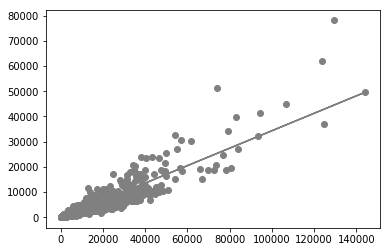

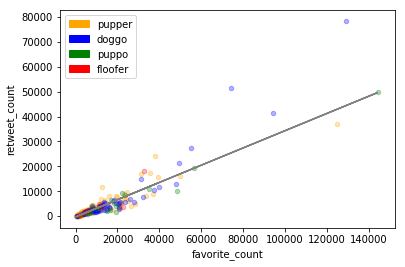

In [766]:
# Create a (sub)database of only attributes I care about 
df = df_clean_final[['retweet_count', 'favorite_count', 'dog_stage']]

# limit number for testing
# df=df.iloc[0:1000]

# Create linear line of best fit of all data points
y, x = df.retweet_count, df.favorite_count
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope*x+intercept
plt.plot(x, y, 'o', x, line, color='gray')

print('Line Equation: retweets = ({})*favorites + {}'.format(slope,intercept))
print('Correlation of line of best fit: {}'.format(r_value))

#####


# Create separate databases for each dog stage (don't count mutliple classifications)
df_puppers = df[df['dog_stage'] == 'pupper']
df_puppo = df[df['dog_stage'] == 'puppo']
df_doggo = df[df['dog_stage'] == 'doggo']
df_floofer = df[df['dog_stage'] == 'floofer']
df_none = df[df['dog_stage'] == 'None']



# Plot all data to see general shape
bx = df_puppers.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Orange', alpha=0.3)
df_doggo.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Blue', ax=bx, alpha=0.3)
df_puppo.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Green', ax=bx, alpha=0.3)
df_floofer.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Red', ax=bx, alpha=0.3)


# Legend
puppers = mpatches.Patch(label='pupper', color = 'Orange')
doggo = mpatches.Patch(label='doggo', color = 'Blue')
puppo = mpatches.Patch(label='puppo', color = 'Green')
floofer = mpatches.Patch(label='floofer', color = 'Red')

plt.legend(handles=[puppers, doggo, puppo, floofer])
plt.plot(x, line, color='gray')

plt.show()

We first created a scatterplot of all tweets (many tweets have no dog stage specified) as well as a linear line of best. Note that the relationship may be more complicated and not necessarily linear but this is to give us a general idea of our data relationship. 

We can observe that in our initial plot that most of the tweets have less than 40,000 favorites and less than 20,000 favorites. We also notice that from the equation for the line of best fit that there tends to be 3 times as many favorites as retweets. However we notice that as the values get larger, the ratio of retweets to favorites get larger (further above the line of best fit).

When we highlight the dog stages (ignoring those that were not classified), we see the smaller values bunch below the original line of best fit. We will have to zoom in to this area to better see observe the differences between different dog stages. 


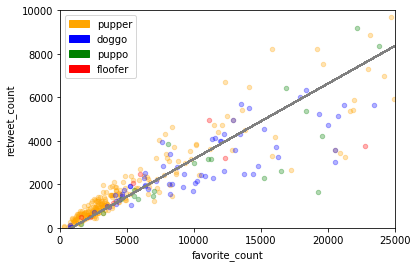

In [764]:
# Zoom into where most data resides
xlim = (0, 25000)
ylim = (0, 10000)

# Recreate the same plot (but now it will be zoomed in)
ax = df_puppers.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Orange', alpha=0.3, ylim=ylim, xlim=xlim)
df_doggo.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Blue', ax=ax, alpha=0.3, ylim=ylim, xlim=xlim)
df_puppo.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Green', ax=ax, alpha=0.3, ylim=ylim, xlim=xlim)
df_floofer.plot(kind = 'scatter', x='favorite_count', y='retweet_count', color='Red', ax=ax, alpha=0.3, ylim=ylim, xlim=xlim)


plt.legend(handles=[puppers, doggo, puppo, floofer])
plt.plot(x, line, color='gray')

plt.show()


We zoomed in our plot and we can very quickly observe that there are more tweets classified as puppers than any other classification. We also notice that most puppers are lower valued and tend to have a higher ratio of retweets to favorites than the line of best fit. Next we notice that nearly every other classification tends to have a lower ratio of retweets to favorites (more favorites) than the puppers classification. This particularly apparent for doggo, the next most populous classification. We also notice that the tweets classified as doggos tend to have higher values compared to the pupper tweets which tend to have more lower values than higher values.


### Most Common Dog Breeds

Motivation: Which are the most common breeds? Are some dog breeds more common in tweets?

In [80]:
# Get attributes before determinig dog breed
attributes = ['retweet_count', 'favorite_count', 'rating_denominator', 'rating_numerator']
df_dog_breeds = df_clean_final[attributes].copy()

# Create rating column
def percent_rating(row):
    if row['rating_denominator'] == 0:
        return 0
    return row['rating_numerator']/row['rating_denominator']


df_dog_breeds['rating'] = df_dog_breeds.apply(percent_rating, axis=1)

In [713]:
# Get needed attributes for possible dog
attributes = ['p1', 'p1_dog', 'p1_conf', 'p2', 'p2_dog', 'p2_conf', 'p3', 'p3_dog', 'p3_conf']
df_possible_breeds = df_clean_final[attributes].copy()

# Create default for breeds and confidence
df_possible_breeds['breed'] = ''
df_possible_breeds['breed_conf'] = 1

# For each entry, check which is the most likely breed
def best_breed_match(row):
    
    # Defaults to compare against
    breed = 'not_dog'
    confidence = 0
    
    # Only keep if it is a possible dog
    dog_preds = [(row[['p1', 'p1_dog', 'p1_conf']]), (row[['p2', 'p2_dog', 'p2_conf']]), (row[['p3', 'p3_dog', 'p3_conf']])]
    # Use this for easy reference
    index_breed, index_isDog, index_conf = 0,1,2
    
    for pred in dog_preds:
        # If it's a dog breed, check if it's max confidence seen
        if pred[index_isDog]:
            # save breed and confidence if higher confidence
            if pred[index_conf] >= confidence:
                breed = pred[index_breed]
                confidence = pred[index_conf]
    
    # Update breed list
    row['breed'] = breed
    row['breed_conf'] = confidence
    return row
        
    breeds = [row['p1'], row['p2'], row['p3']]
    
    
df_possible_breeds = df_possible_breeds.apply(best_breed_match, axis=1)

# Save info into dog breed dataframe
df_dog_breeds['breed'] = df_possible_breeds['breed']

df_dog_breeds['breed_conf'] = df_possible_breeds['breed_conf']

In [694]:
# show 30 most common dog breeds
df_dog_breeds.breed.value_counts()[:30] # 'not_dog' is most common so keep this out of plot

not_dog                           488
golden_retriever                  158
labrador_retriever                108
pembroke                           95
chihuahua                          91
pug                                62
toy_poodle                         51
chow                               48
samoyed                            42
pomeranian                         42
malamute                           33
chesapeake_bay_retriever           31
french_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 25
eskimo_dog                         22
german_shepherd                    21
staffordshire_bullterrier          21
cardigan                           21
shih-tzu                           20
beagle                             20
siberian_husky                     20
shetland_sheepdog                  19
maltese_dog                        19
rottweiler                         19
kuvasz                             18
lakeland_ter

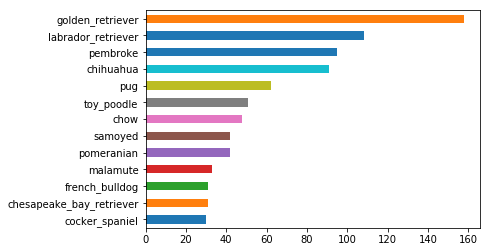

In [770]:
# Plot the 12 most common dog breeds in bar chart
only_dogs = df_dog_breeds['breed'] != 'not_dog'
df_dog_breeds[only_dogs].breed.value_counts()[12::-1].plot(kind='barh')

We first look at the count of the first 30 most common dog breeds. We see that nearly 500 tweets were classified as not a dog, which is about 3 times more than the first actual dog breed. This could be that many tweets from this ratings archive are not dogs, however this seems strange unlikely. It is possible that the image predictions has misclassified many of the images as not dogs. This seems more likely especially considering that the data comes from an image predictor code which could have made significant mistakes.

We next plotted the 12 most common (actual) dog breeds in a bar chart. We see that according to this data, the most common dog breed in the tweets was the golden retriever with over 150 tweets of the dog breed. The next four most common breeds, in descending order, were the labrador retrieve, the pembrooke (corgi), chihuahua, and the pug. The top three breeds seem to fit well with my general internet usage and experience on seeing different images of dogs. 

However, we should again be careful concluding too much from that data since we are relying on the image prediction code to inform us of the dog breed. It is possible that certain dog breeds were harder to determine by the prediction code and should acutally be higher in the list. In future investigations, the effectiveness of the image prediction data could be tested more throughly to ensure this data accurately reflects the different dog breeds.

### Popularity of Dog Breeds 

Motivation: Which are the most popular breeds (based on favorites & retweets)?

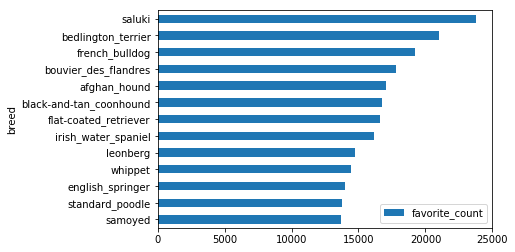

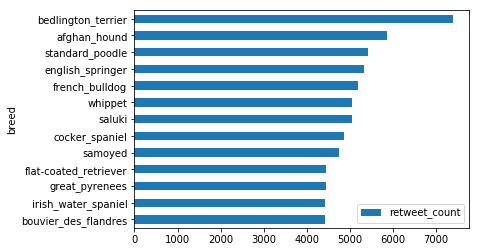

In [788]:
# Plot based on a particular factor
def plot_based_on(factor):
    return df_dog_rate[[factor]].sort_values(factor,ascending=False)[12::-1].plot(kind='barh')

# Look at favorite count and retweet count plots
plot_based_on('favorite_count')
plot_based_on('retweet_count')

We averaged the retweets and favorites for each breed and plotted the 12 highest breeds for each factor. Only the french bulldog and the samoyed appear in one of these plots as well as the plot of the 12 most common breeds. This suggests that the most common dog breeds on average didn't have the highest retweets favorites. This might make sense as perhaps the most retweets and favorites are on less common breeds since they stick out. This relationship could be interesting to investigate in the future.

Next we notice that most of the breeds appear in both graphs; the dog breeds leonberg, black and tan coonhound, and bouiver des flanders only appear in the top favorite chart and the dog breeds cocker spaniel, samoyed, and great pyreness only appear in the top retweet chart. This suggests that having a high number of retweets is positively correlated with a high number of favorites which was reflected in one of our first graphs.

We see that although most breeds appear in both charts, the bedlington terrier is consistently at the top of both charts with the top spot for average retweets and 2nd top spot for average favorites. This appears that this dog breed is likely the most popular tweet perhaps because it is an unusual (but adorable) dog breed.